In [1]:
from Utils.utils import start_environment
import Utils.data_utils as data
import os

In [2]:
start_environment()

In [3]:
PATH_W2V = "../w2v/wikipedia-pubmed-and-PMC-w2v.bin"
PATH_DATA = "../data/"

PATH_TRAIN = PATH_DATA + "drugsComTrain_raw.tsv"
PATH_TEST = PATH_DATA + "drugsComTest_raw.tsv"

# DATA

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from dl_models import ModelGenerator
# Might need to install punkt and stopwords
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')

Using TensorFlow backend.


In [5]:
from keras.preprocessing.sequence import pad_sequences

MAX_NB_WORDS = 30000
EMBEDDING_DIM = 200
MAX_SEQUENCE_LENGTH = 250

# Load the data
dataset = data.Dataset()
dataset.load_csv(PATH_TRAIN, PATH_TEST, label_name='rating', separator='\t', columns=[3,4])
dataset.make_dev_split()


# Define the model for the embeddings and the tokenizer
model = ModelGenerator.load_W2V_model(PATH_W2V, binary=True)
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)

Loaded W2V model


In [6]:
# Loaded Data
df_train, df_test, df_dev = dataset.get_all()

In [7]:
# Fit the tokenizer
tokenizer.fit_on_texts(df_train["review"].values)

# We tokenize the sentences, as well as clean them. These texts are turned into sequences.
df_train["tokenized_review"] = tokenizer.texts_to_sequences(df_train["review"])

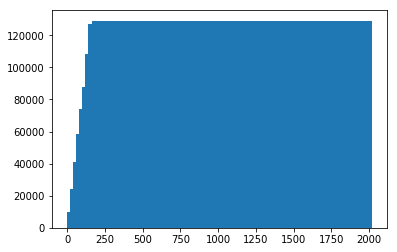

In [8]:
# Get the histogram to know the maximum size of the writtings
plt.hist([len(e) for e in df_train["tokenized_review"]], cumulative=True, bins=100)
plt.show()

In [9]:
padded_review = pad_sequences(df_train["tokenized_review"], MAX_SEQUENCE_LENGTH)
df_train["padded_review"] = list(padded_review)

In [10]:
embedding_matrix = ModelGenerator.generate_embedding_matrix(tokenizer.word_index, MAX_NB_WORDS, model)

Hits: 24004
Total: 30000


# NETWORKS

In [11]:
import tensorflow as tf
import pandas as pd


In [12]:
from keras.layers import LSTM, GRU


### WARNING ###
# The experiments will be conformed by all the possible combination of parameters.
# The growth is then, exponential.
# Caution is advised.

input_length = [MAX_SEQUENCE_LENGTH]
output_length = [1]
load_emb = [False]
emb_size = [300]
vocabulary_length = [5000]
trainable_emb = [True]
cnn_size = [[64], [64, 64], [128], [128, 128]]
cnn_filter = [[3], [10]]
rnn_size = [[None]]
cell_type = [LSTM]
bidirectional = [False]
attention = [False]
dropout = [0.5]
dnn_size = [[32]]
batch_size = [None]
epochs = [20]
patience = [4]

# TODO process those two lists as a dictionary instead.
param   = [input_length, output_length, load_emb, emb_size, vocabulary_length, trainable_emb, cnn_size, cnn_filter, rnn_size, cell_type, bidirectional, attention, dropout, dnn_size, batch_size]
indexes = ["input_length", "output_length", "load_emb", "emb_size", "vocabulary_length", "trainable_emb", "cnn_size", "cnn_filter", "rnn_size", "cell_type", "bidirectional", "attention", "dropout", "dnn_size", "batch_size"]

In [13]:
from dl_models import ModelExperiments

In [14]:
me = ModelExperiments(param, indexes)

In [15]:
models, experiment_names = me.compile_models(verbose=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 250)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 250, 300)          1500000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 248, 64)           57664     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 82, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5248)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                167968    
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 250)               0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 250, 300)          1500000   
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 248, 128)          115328    
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 82, 128)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 80, 128)           49280     
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 26, 128)           0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3328)              0         
__________

In [16]:
me.train_models(padded_review, df_train["rating"], retrain_models=False)



********************************************

input_length_250_output_length_1_load_emb_False_emb_size_300_vocabulary_length_5000_trainable_emb_True_cnn_size_128-128_cnn_filter_3_rnn_size_None_cell_type_LSTM_bidirectional_False_attention_False_dropout_0.5_dnn_size_32_batch_size_None
Callbacks are the following
[<keras.callbacks.ReduceLROnPlateau object at 0x7ef9a47f95c0>, <keras.callbacks.EarlyStopping object at 0x7ef9a47f95f8>, <keras.callbacks.TensorBoard object at 0x7ef9b6227400>]
Train on 96777 samples, validate on 32260 samples
Epoch 1/20
96777/96777 [==============================] - 19s 194us/step - loss: -95.3857 - binary_accuracy: 0.1351 - val_loss: -95.5288 - val_binary_accuracy: 0.1324
Epoch 2/20
96777/96777 [==============================] - 18s 182us/step - loss: -95.5612 - binary_accuracy: 0.1351 - val_loss: -95.5288 - val_binary_accuracy: 0.1324
Epoch 3/20
96777/96777 [==============================] - 18s 183us/step - loss: -95.5612 - binary_accuracy: 0.1351 - val_los

In [22]:
!tensorboard --logdir=models/logs/input_length_250_output_length_1_load_emb_False_emb_size_300_vocabulary_length_5000_trainable_emb_True_cnn_size_128-128_cnn_filter_10_rnn_size_None_cell_type_LSTM_bidirectional_False_attention_False_dropout_0.5_dnn_size_32_batch_size_None

Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 11, in <module>
    sys.exit(run_main())
  File "/usr/local/lib/python3.6/dist-packages/tensorboard/main.py", line 51, in run_main
    program.setup_environment()
  File "/usr/local/lib/python3.6/dist-packages/tensorboard/program.py", line 69, in setup_environment
    util.setup_logging()
  File "/usr/local/lib/python3.6/dist-packages/tensorboard/util.py", line 50, in setup_logging
    locale.setlocale(locale.LC_ALL, '')
  File "/usr/lib/python3.6/locale.py", line 598, in setlocale
    return _setlocale(category, locale)
locale.Error: unsupported locale setting
Error in sys.excepthook:
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/apport_python_hook.py", line 63, in apport_excepthook
    from apport.fileutils import likely_packaged, get_recent_crashes
  File "/usr/lib/python3/dist-packages/apport/__init__.py", line 5, in <module>
    from apport.report import Report
  File "/usr/lib

In [21]:
!export LC_ALL="en_US.UTF-8"
!export LC_CTYPE="en_US.UTF-8"
!echo 1234 |sudo -S update-locale LANG=en_HK.UTF-8

[sudo] password for praez: perl: warning: Setting locale failed.
perl: warning: Please check that your locale settings:
	LANGUAGE = "en_US:en",
	LC_ALL = (unset),
	LC_TIME = "es_ES.UTF-8",
	LC_MONETARY = "es_ES.UTF-8",
	LC_CTYPE = "en_AU.UTF-8",
	LC_ADDRESS = "es_ES.UTF-8",
	LC_TELEPHONE = "es_ES.UTF-8",
	LC_NAME = "es_ES.UTF-8",
	LC_MEASUREMENT = "es_ES.UTF-8",
	LC_IDENTIFICATION = "es_ES.UTF-8",
	LC_NUMERIC = "es_ES.UTF-8",
	LC_PAPER = "es_ES.UTF-8",
	LANG = "en_US.UTF-8"
    are supported and installed on your system.
perl: warning: Falling back to a fallback locale ("en_US.UTF-8").


In [19]:
!export LC_ALL=C